note

*   veritcally or horizontally rows on confusion matrix add up to 100%
*   add a pandas dataframe showing true and predicted label
*   save models on google drive
*   save dataset on google drive

**1. Dataset Extraction and Preprocessing**

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_hub as hub

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import os, sys
import json
from os import listdir
from os.path import isfile, join
import shutil 

from keras.models import load_model

In [2]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [3]:
ai_project_files_path = '/content/gdrive/MyDrive/AI_Project_Files'

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Global variables

tf.random.set_seed(42)

IS_FIRST_TIME = False

IS_RUN_MODEL_0 = False
IS_RUN_MODEL_1 = False
IS_RUN_MODEL_2 = False

ROOT_DIR_10_P = ai_project_files_path + '/10_food_classes_10_percent'
ROOT_DIR_1_P = ai_project_files_path + '/10_food_classes_1_percent'
ROOT_DIR_100_P = ai_project_files_path + '/10_food_classes_all_data'

TARGET_SIZE = (224, 224)

In [5]:
ROOT_DIR_10_P, ROOT_DIR_1_P, ROOT_DIR_100_P

('/content/gdrive/MyDrive/AI_Project_Files/10_food_classes_10_percent',
 '/content/gdrive/MyDrive/AI_Project_Files/10_food_classes_1_percent',
 '/content/gdrive/MyDrive/AI_Project_Files/10_food_classes_all_data')

In [6]:
# if IS_FIRST_TIME:

#   !wget [10_Percent_URL]
#   !unzip 10_food_classes_10_percent.zip 

#   # !wget https://raw.githubusercontent.com/Junaidhassan99/ml_helper/master/ml_helper_functions.py

#   !mv "/content/10_food_classes_10_percent" "/content/gdrive/MyDrive/AI_Project_Files"

#   !wget [1_Percent_URL]
#   !unzip 10_food_classes_1_percent.zip 

#   !mv "/content/10_food_classes_1_percent" "/content/gdrive/MyDrive/AI_Project_Files"

#   !wget [100_Percent_URL]
#   !unzip 10_food_classes_all_data.zip

#   !mv "/content/10_food_classes_all_data" "/content/gdrive/MyDrive/AI_Project_Files"

In [7]:
def plot_loss_curve(model_fit):

  """
  It will plot a graph with loss and accuracy on vertical
  and epochs on horizontal axis

  model_fit: an object returned by fit function of tensorflow
  """

  pd.DataFrame(model_fit.history).plot()

  plt.ylabel('metrices')
  plt.xlabel('epochs')

In [8]:
def sns_confusion_matrix(Y_true, Y_pred, figsize=(5, 5), class_names = None, label_size=1.4, text_size=16):

  cm = confusion_matrix(Y_true, Y_pred)
  # Normalise
  cmn = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])*100
  fig, ax = plt.subplots(figsize=figsize)
  sns.set(font_scale=label_size) # for label size
  sns.heatmap(cmn, annot=True, fmt='.2f', annot_kws={"size": text_size}, xticklabels=class_names, yticklabels=class_names)
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show(block=False)

Note:

*   image_dataset_from_directory do not perform image normalization


In [9]:
# test data for all models

test_data = tf.keras.utils.image_dataset_from_directory(ROOT_DIR_10_P+'/test',
                                                        label_mode='int',
                                                        batch_size=32,
                                                        image_size=TARGET_SIZE,
                                                        )

Found 2500 files belonging to 10 classes.


In [10]:
# validation and train data 10%

train_data_10_p = tf.keras.utils.image_dataset_from_directory(ROOT_DIR_10_P+'/train',
                                                         label_mode='int',
                                                         batch_size=32,
                                                         image_size=TARGET_SIZE,
                                                         validation_split=0.2,
                                                         subset="training",
                                                         seed=42,
                                                         )

valid_data_10_p = tf.keras.utils.image_dataset_from_directory(ROOT_DIR_10_P+'/train',
                                                         label_mode='int',
                                                         batch_size=32,
                                                         image_size=TARGET_SIZE,
                                                         validation_split=0.2,
                                                         subset="validation",
                                                         seed=42,
                                                         )
    

Found 750 files belonging to 10 classes.
Using 600 files for training.
Found 750 files belonging to 10 classes.
Using 150 files for validation.


In [11]:
# validation and train data 1%

train_data_1_p = tf.keras.utils.image_dataset_from_directory(ROOT_DIR_1_P+'/train',
                                                         label_mode='int',
                                                         batch_size=32,
                                                         image_size=TARGET_SIZE,
                                                         validation_split=0.2,
                                                         subset="training",
                                                         seed=42,
                                                         )

valid_data_1_p = tf.keras.utils.image_dataset_from_directory(ROOT_DIR_1_P+'/train',
                                                         label_mode='int',
                                                         batch_size=32,
                                                         image_size=TARGET_SIZE,
                                                         validation_split=0.2,
                                                         subset="validation",
                                                         seed=42,
                                                         )
    

Found 70 files belonging to 10 classes.
Using 56 files for training.
Found 70 files belonging to 10 classes.
Using 14 files for validation.


In [12]:
# validation and train data 100%

train_data_100_p = tf.keras.utils.image_dataset_from_directory(ROOT_DIR_100_P+'/train',
                                                         label_mode='int',
                                                         batch_size=32,
                                                         image_size=TARGET_SIZE,
                                                         validation_split=0.2,
                                                         subset="training",
                                                         seed=42,
                                                         )

valid_data_100_p = tf.keras.utils.image_dataset_from_directory(ROOT_DIR_100_P+'/train',
                                                         label_mode='int',
                                                         batch_size=32,
                                                         image_size=TARGET_SIZE,
                                                         validation_split=0.2,
                                                         subset="validation",
                                                         seed=42,
                                                         )
    

Found 7500 files belonging to 10 classes.
Using 6000 files for training.
Found 7500 files belonging to 10 classes.
Using 1500 files for validation.


In [13]:
len(valid_data_10_p), len(train_data_10_p), len(valid_data_1_p), len(train_data_1_p), len(valid_data_100_p), len(train_data_100_p), 

(5, 19, 1, 2, 47, 188)

In [14]:
# labels in text form

import os
from os import walk

class_names=[]
class_names = sorted(os.listdir(ROOT_DIR_10_P+'/test'))


print(class_names,len(class_names))

['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'] 10


(224, 224, 3)
CPU times: user 1.11 s, sys: 276 ms, total: 1.38 s
Wall time: 38.9 s


<Figure size 432x288 with 0 Axes>

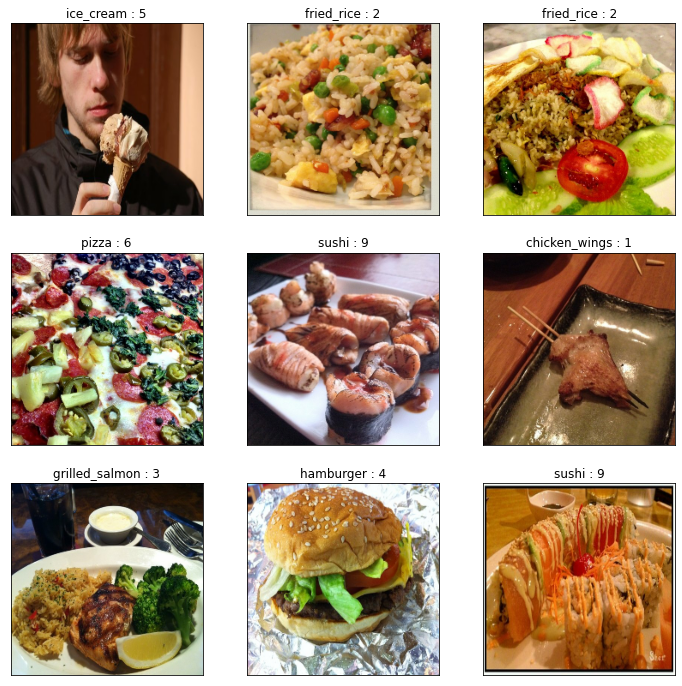

In [15]:
%%time

import random

for imgs, labels in train_data_10_p.take(1):
  # print(imgs.shape())

  # plt.imshow(imgs[0]/255., cmap='gray')
  print(imgs[0].shape)

  plt.figure()
  f, axarr = plt.subplots(3,3,figsize=(12,12)) 

  for i in range(3):
    for j in range(3):
        img_index=random.randint(0, len(imgs)-1)
        axarr[i,j].imshow(imgs[img_index]/255., cmap='gray')
        axarr[i,j].set_title(class_names[labels[img_index].numpy()]+' : '+str(labels[img_index].numpy()))

        # added later
        axarr[i,j].set_xticks([], minor=False)
        axarr[i,j].set_yticks([], minor=False)

  break

**2. Model 0:**


*   VGG 16
*   Transfer Learning = False
*   Agmentation = True
*   Epochs = 5 
*   Data = 10% 
*   Optimizer = Adam
*   Initial LR = 0.0001
*   Metrice = accuracy
*   Loss = SparseCategoricalCrossentropy




In [16]:
model_0 = tf.keras.Sequential([
    # input layer
    tf.keras.Input(shape = [224, 224, 3]),

    # hidden layers
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, padding='same', activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, padding='same', activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=10, kernel_size=3, padding='same', activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, padding='same', activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=10, kernel_size=3, padding='same', activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, padding='same', activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2),
    

    # output layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=20, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax),

])

In [17]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 10)       0         
 2D)                                                    

In [18]:
if IS_RUN_MODEL_0:

  model_0.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001,), 
                             loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'],)

  early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=3,)

  history_model_0 = model_0.fit(train_data_10_p, epochs=5, steps_per_epoch=len(train_data_10_p), 
                           validation_data=valid_data_10_p, validation_steps=len(valid_data_10_p),
                           callbacks=[early_stopping_callback])
  
  plot_loss_curve(history_model_0)

  model_0.save(os.path.join(ai_project_files_path, 'MODEL_0_FILE.h5'))
  
else:

  model_0 = load_model(os.path.join(ai_project_files_path, 'MODEL_0_FILE.h5'))

In [19]:
%%time

model_0.evaluate(test_data)

79/79 [==============================] - 330s 4s/step - loss: 2.3022 - accuracy: 0.1004
CPU times: user 1min 39s, sys: 1.15 s, total: 1min 40s
Wall time: 6min 22s


[2.3021647930145264, 0.10040000081062317]

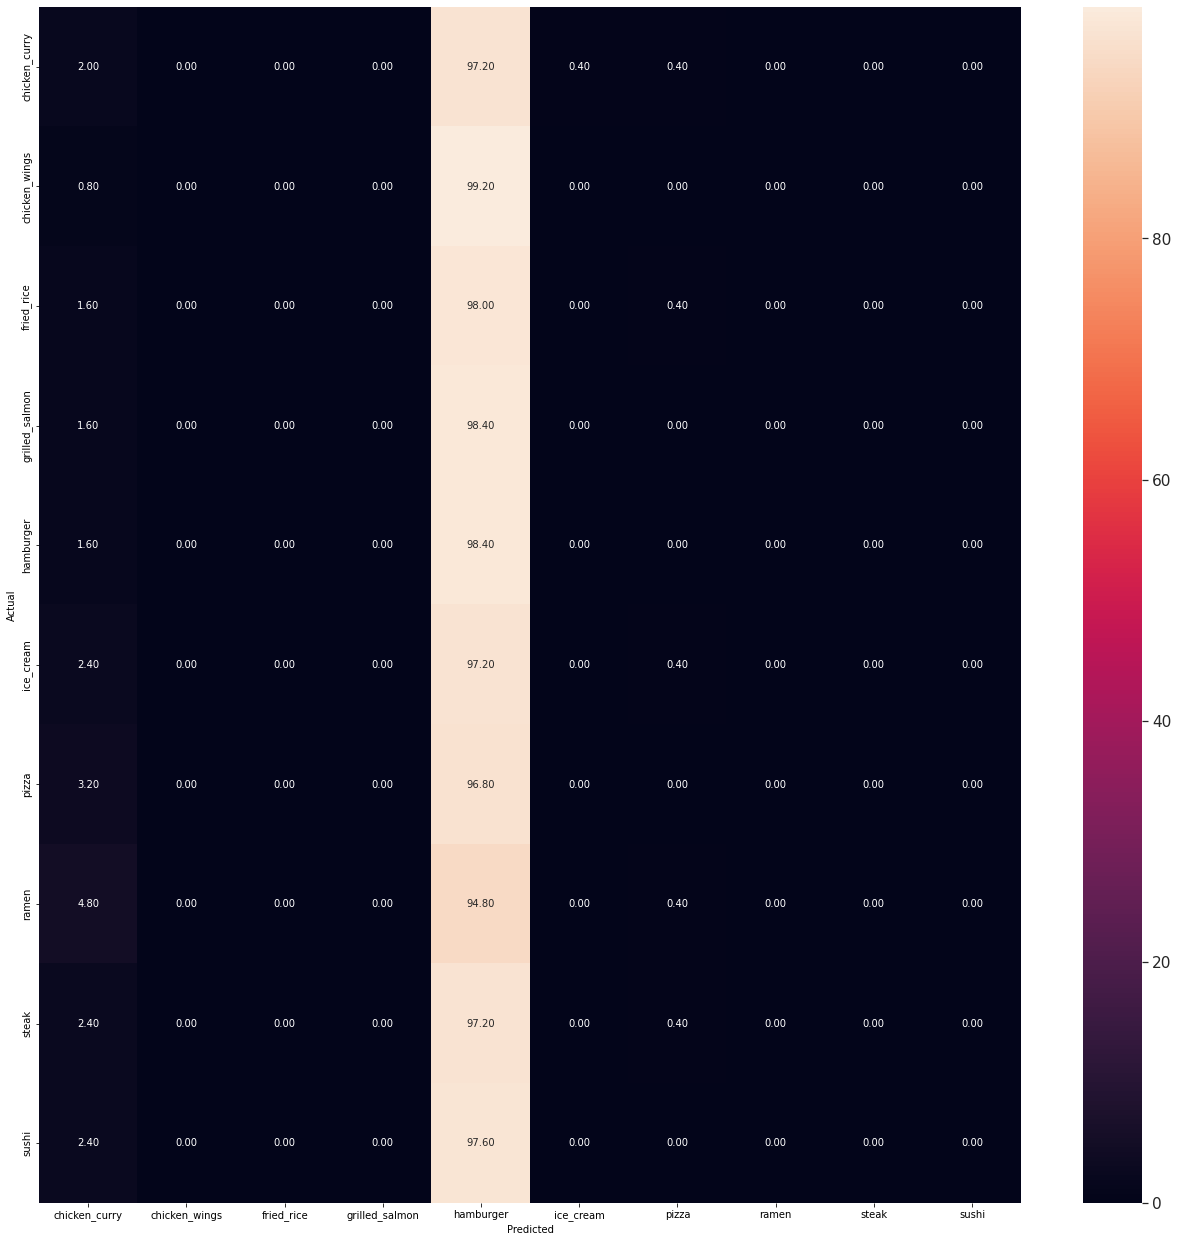

CPU times: user 3min 38s, sys: 3.88 s, total: 3min 42s
Wall time: 3min 22s


In [20]:
%%time

# Y_pred = model_2.predict(test_data).argmax(axis=0)

Y_pred = []
Y_true = []

for imgs, labels in test_data.unbatch():

  Y_true.append(labels)
  Y_pred.append(model_0.predict(np.expand_dims(imgs, axis=0), verbose=0).argmax(axis=1))

sns_confusion_matrix(Y_true,Y_pred,figsize=(22,22),class_names=class_names,text_size=10)

3. Model 1:


*   VGG 16
*   Transfer Learning = False
*   Agmentation = True
*   Epochs = 5 
*   Data = 10% 
*   Optimizer = Adam
*   Initial LR = 0.001
*   Metrice = accuracy
*   Loss = SparseCategoricalCrossentropy




In [21]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.15,
                                                            rotation_range=0.2,
                                                            width_shift_range=0.2,
                                                            height_shift_range=0.2,
                                                            shear_range=0.2,
                                                            zoom_range=0.2,
                                                            horizontal_flip=True,
                                                            vertical_flip=True,
                                                            brightness_range=(0.5,1.5))

test_data_10_p_gen = test_gen.flow_from_directory(ROOT_DIR_10_P+'/test',
                                         target_size=TARGET_SIZE,
                                         class_mode='sparse', 
                                         batch_size=32,
                                         seed=42)

train_data_10_p_gen = train_gen.flow_from_directory(ROOT_DIR_10_P+'/train',
                                         target_size=TARGET_SIZE,
                                         class_mode='sparse', 
                                         batch_size=32,
                                         subset='training',
                                         seed=42)

valid_data_10_p_gen = train_gen.flow_from_directory(ROOT_DIR_10_P+'/train',
                                         target_size=TARGET_SIZE,
                                         class_mode='sparse', 
                                         batch_size=32,
                                         subset='validation',
                                         seed=42)

Found 2500 images belonging to 10 classes.
Found 640 images belonging to 10 classes.
Found 110 images belonging to 10 classes.


In [22]:
test_data_100_p_gen = test_gen.flow_from_directory(ROOT_DIR_100_P+'/test',
                                         target_size=TARGET_SIZE,
                                         class_mode='sparse', 
                                         batch_size=32,
                                         seed=42)

train_data_100_p_gen = train_gen.flow_from_directory(ROOT_DIR_100_P+'/train',
                                         target_size=TARGET_SIZE,
                                         class_mode='sparse', 
                                         batch_size=32,
                                         subset='training',
                                         seed=42)

valid_data_100_p_gen = train_gen.flow_from_directory(ROOT_DIR_100_P+'/train',
                                         target_size=TARGET_SIZE,
                                         class_mode='sparse', 
                                         batch_size=32,
                                         subset='validation',
                                         seed=42)

Found 2500 images belonging to 10 classes.
Found 6380 images belonging to 10 classes.
Found 1120 images belonging to 10 classes.


(224, 224, 3)
CPU times: user 760 ms, sys: 17.2 ms, total: 777 ms
Wall time: 5.23 s


<Figure size 432x288 with 0 Axes>

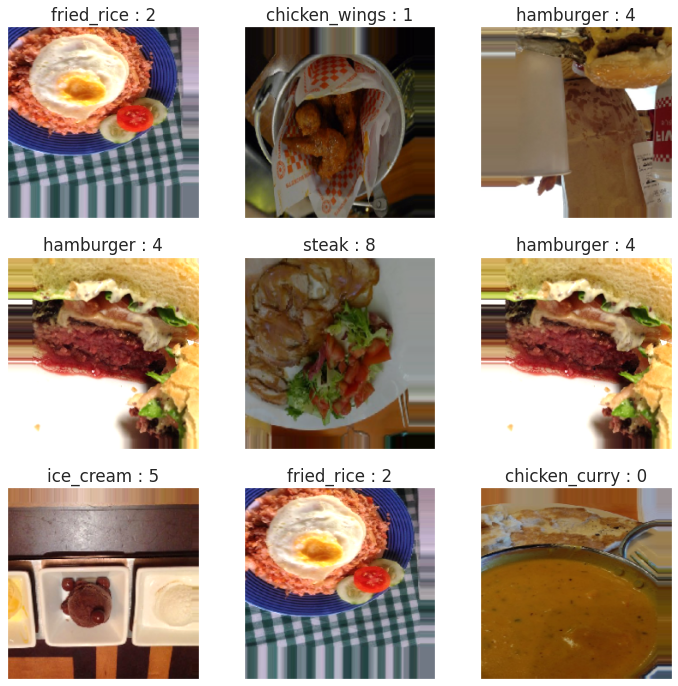

In [23]:
%%time

import random

imgs, labels = train_data_10_p_gen.next()

print(imgs[0].shape)

plt.figure()

f, axarr = plt.subplots(3,3,figsize=(12,12)) 

for i in range(3):
  for j in range(3):
      img_index=random.randint(0, len(imgs)-1)
      axarr[i,j].imshow(imgs[img_index], cmap='gray')
      axarr[i,j].set_title(class_names[int(labels[img_index])]+' : '+str(int(labels[img_index])))

      axarr[i,j].set_xticks([], minor=False)
      axarr[i,j].set_yticks([], minor=False)

In [24]:
model_1 = tf.keras.models.clone_model(model_0)

In [25]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 10)       0         
 2D)                                                    

In [26]:
if IS_RUN_MODEL_1:

  model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001,), 
                             loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'],)

  early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=3,)

  history_model_1 = model_1.fit(train_data_100_p_gen, epochs=100, steps_per_epoch=len(train_data_100_p_gen), 
                           validation_data=valid_data_100_p_gen, validation_steps=len(valid_data_100_p_gen),
                           callbacks=[early_stopping_callback])
  
  plot_loss_curve(history_model_1)

  model_1.save(os.path.join(ai_project_files_path, 'MODEL_1_FILE_EPOCH_100.h5'))
  
else:

  model_1 = load_model(os.path.join(ai_project_files_path, 'MODEL_1_FILE_EPOCH_100.h5'))

In [27]:
%%time

model_1.evaluate(test_data_10_p_gen)

79/79 [==============================] - 59s 739ms/step - loss: 1.8234 - accuracy: 0.3604
CPU times: user 1min 47s, sys: 1.55 s, total: 1min 48s
Wall time: 59.5 s


[1.8233520984649658, 0.36039999127388]

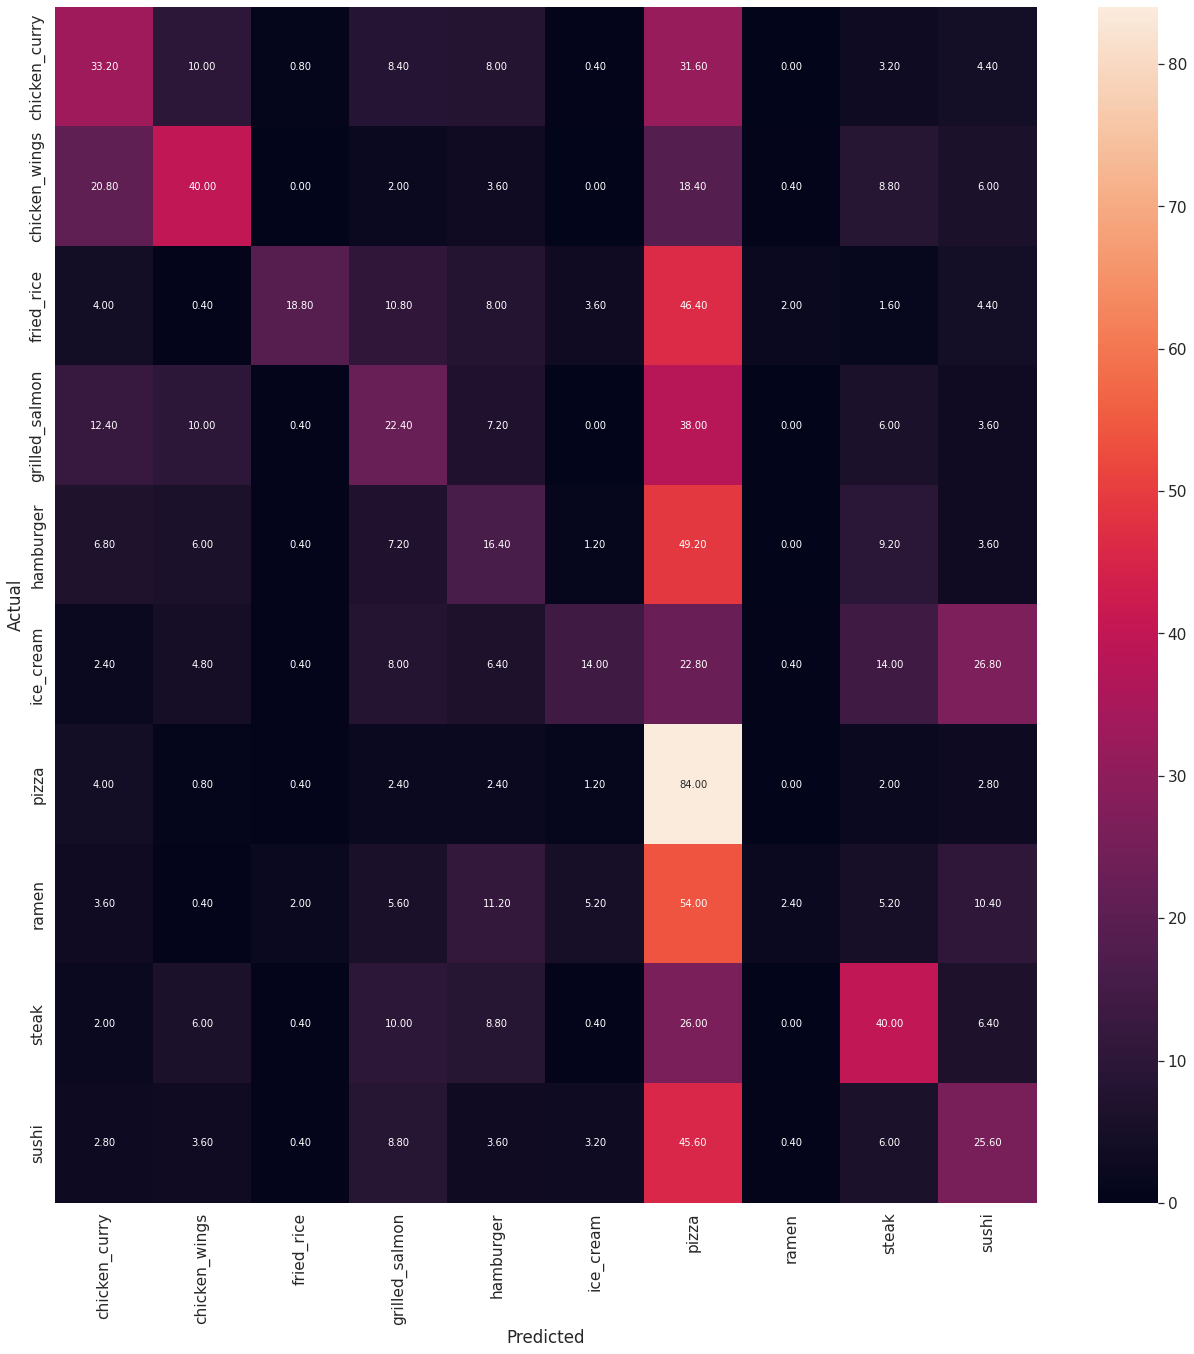

CPU times: user 3min 39s, sys: 4.51 s, total: 3min 43s
Wall time: 3min


In [28]:
%%time

# Y_pred = model_2.predict(test_data).argmax(axis=0)

Y_pred = []
Y_true = []

for imgs, labels in test_data.unbatch():

  Y_true.append(labels)
  Y_pred.append(model_1.predict(np.expand_dims(imgs, axis=0), verbose=0).argmax(axis=1))

sns_confusion_matrix(Y_true,Y_pred,figsize=(22,22),class_names=class_names,text_size=10)

4. Model 2

*   EfficientNetB0
*   Transfer Learning = True
*   Fine Tuning = True
*   Agmentation = True
*   Epochs = 10
*   Data = 10%
*   Optimizer = Adam
*   Initial LR = 0.0001
*   Metrice = accuracy
*   Loss = SparseCategoricalCrossentropy

In [29]:
from tensorflow.keras import layers

model_2_aug = tf.keras.Sequential([
  # DO NOT DO IMAGE NORMALIZATION IF MODEL DOES IT BY ITSELF
  # layers.Rescaling(1./255),
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomTranslation(0.2, 0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  layers.RandomContrast(0.2),
])

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

input = layers.Input(TARGET_SIZE+(3,), name='input_layer')

# if we have a model then we pass previous layer as a parameter "model(x)""
# if we have a layer then we pass previous layer as "layer(...)(x)""
x = model_2_aug(input)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name='global_avg_pooling_layer')(x)

output = layers.Dense(10, activation = tf.keras.activations.softmax, name='output_layer')(x)

model_2 = tf.keras.Model(inputs=input, outputs=output)

16705208/16705208 [==============================] - 0s 0us/step


In [30]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling_layer (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
______________________________________________

In [31]:
if IS_RUN_MODEL_2:

  model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

  initial_epoch = 5

  history_model_2 = model_2.fit(train_data_100_p, epochs=initial_epoch, 
                                steps_per_epoch=len(train_data_100_p),
                                validation_data=valid_data_100_p, 
                                validation_steps=len(valid_data_100_p))
  
  model_2.save_weights('model_2_freeze_100')
  
  plot_loss_curve(history_model_2)

  model_2.save(os.path.join(ai_project_files_path, 'MODEL_2_FREEZE_FILE_100.h5'))
  
else:

  model_2 = load_model(os.path.join(ai_project_files_path, 'MODEL_2_FREEZE_FILE_100.h5'))



In [32]:
%%time

model_2.evaluate(test_data)

79/79 [==============================] - 130s 2s/step - loss: 0.3939 - accuracy: 0.8744
CPU times: user 4min 1s, sys: 2.29 s, total: 4min 3s
Wall time: 2min 10s


[0.39385420083999634, 0.8744000196456909]

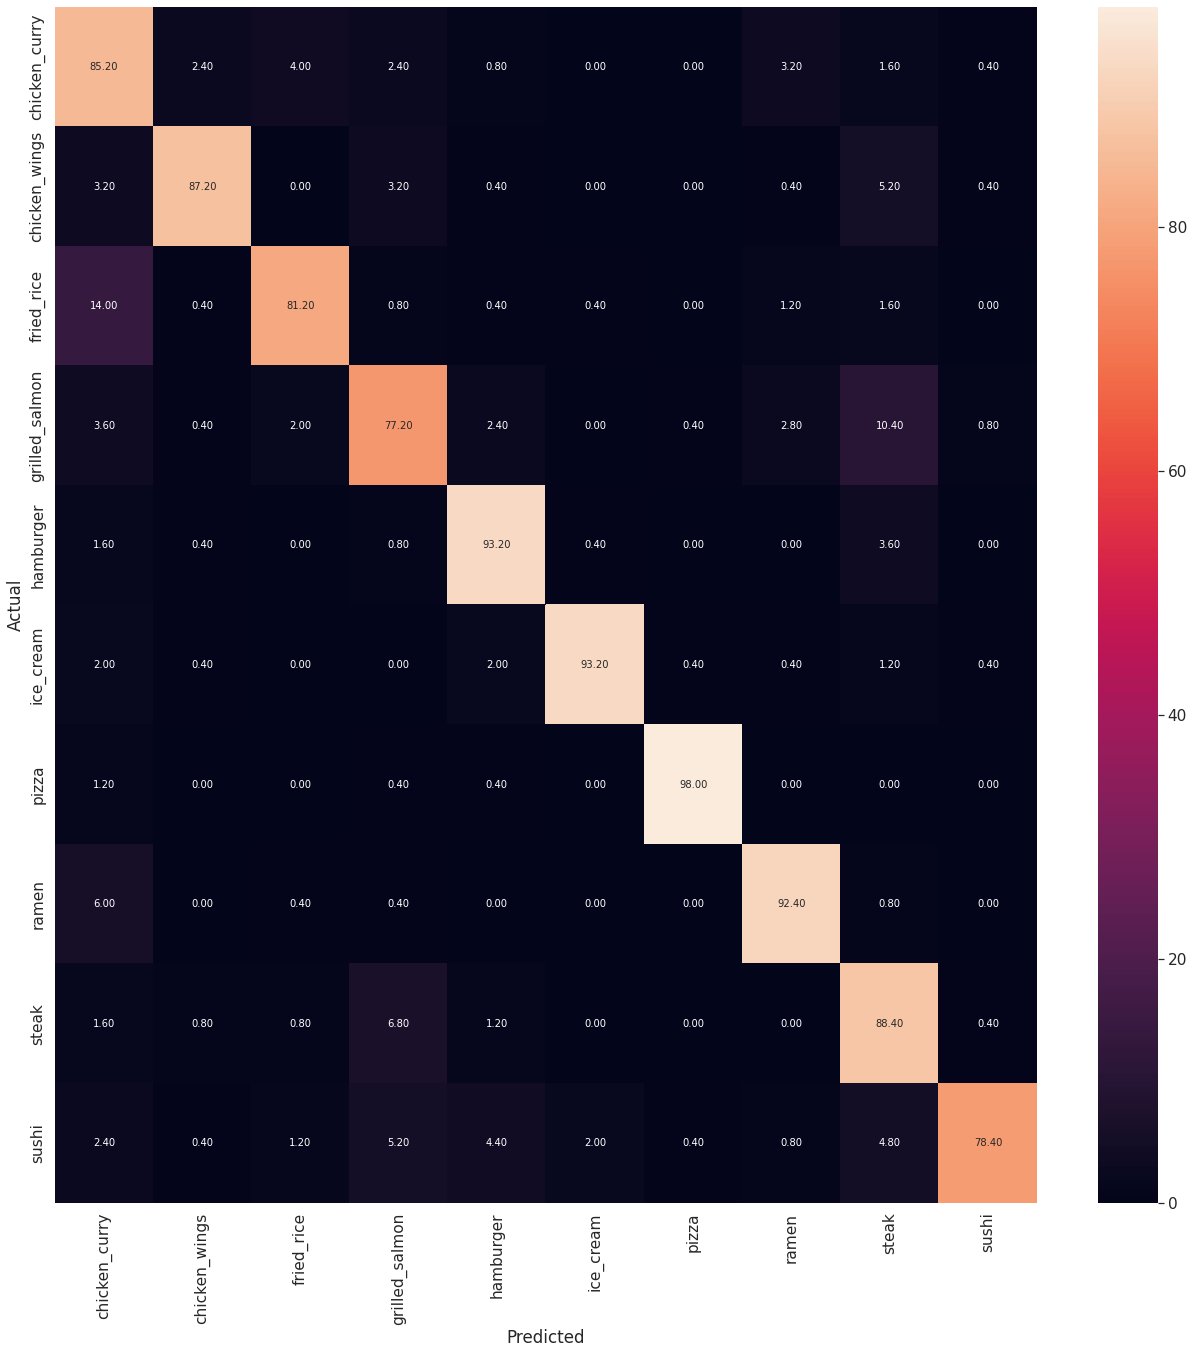

CPU times: user 6min 16s, sys: 10.8 s, total: 6min 26s
Wall time: 5min 22s


In [33]:
%%time

# Y_pred = model_2.predict(test_data).argmax(axis=0)

Y_pred = []
Y_true = []

for imgs, labels in test_data.unbatch():

  Y_true.append(labels)
  Y_pred.append(model_2.predict(np.expand_dims(imgs, axis=0), verbose=0).argmax(axis=1))

sns_confusion_matrix(Y_true,Y_pred,figsize=(22,22),class_names=class_names,text_size=10)

In [34]:
if IS_RUN_MODEL_2:

  # first unfreez all layers
  base_model.trainable = True

  # Refreeze every layer except for the last 20
  for layer in base_model.layers[:-20]:
    layer.trainable = False

  # # check all layers after unfreezing them
  # for layer_number, layer in enumerate(base_model.layers):
  #   print(layer_number, layer, layer.trainable)

  print(history_model_2.epoch[-1])

  model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(0.0001), metrics=['accuracy'])
  
  for layer_number, layer in enumerate(model_2.layers):
    print(layer_number,layer,layer.trainable)

  fine_tune_epoch = initial_epoch + 5

  history_model_2_fine_tuned = model_2.fit(train_data_100_p, epochs=fine_tune_epoch,
                                          initial_epoch=history_model_2.epoch[-1],
                                          steps_per_epoch=len(train_data_100_p),
                                          validation_data=valid_data_100_p, 
                                          validation_steps=len(valid_data_100_p))
  
  plot_loss_curve(history_model_2_fine_tuned)

  model_2.save(os.path.join(ai_project_files_path, 'MODEL_2_FINE_TUNED_FILE_100.h5'))
  
else:

  model_2 = load_model(os.path.join(ai_project_files_path, 'MODEL_2_FINE_TUNED_FILE_100.h5'))

In [35]:
%%time

model_2.evaluate(test_data)

79/79 [==============================] - 133s 2s/step - loss: 0.3153 - accuracy: 0.8952
CPU times: user 4min 5s, sys: 2.53 s, total: 4min 8s
Wall time: 2min 23s


[0.3152787387371063, 0.8952000141143799]

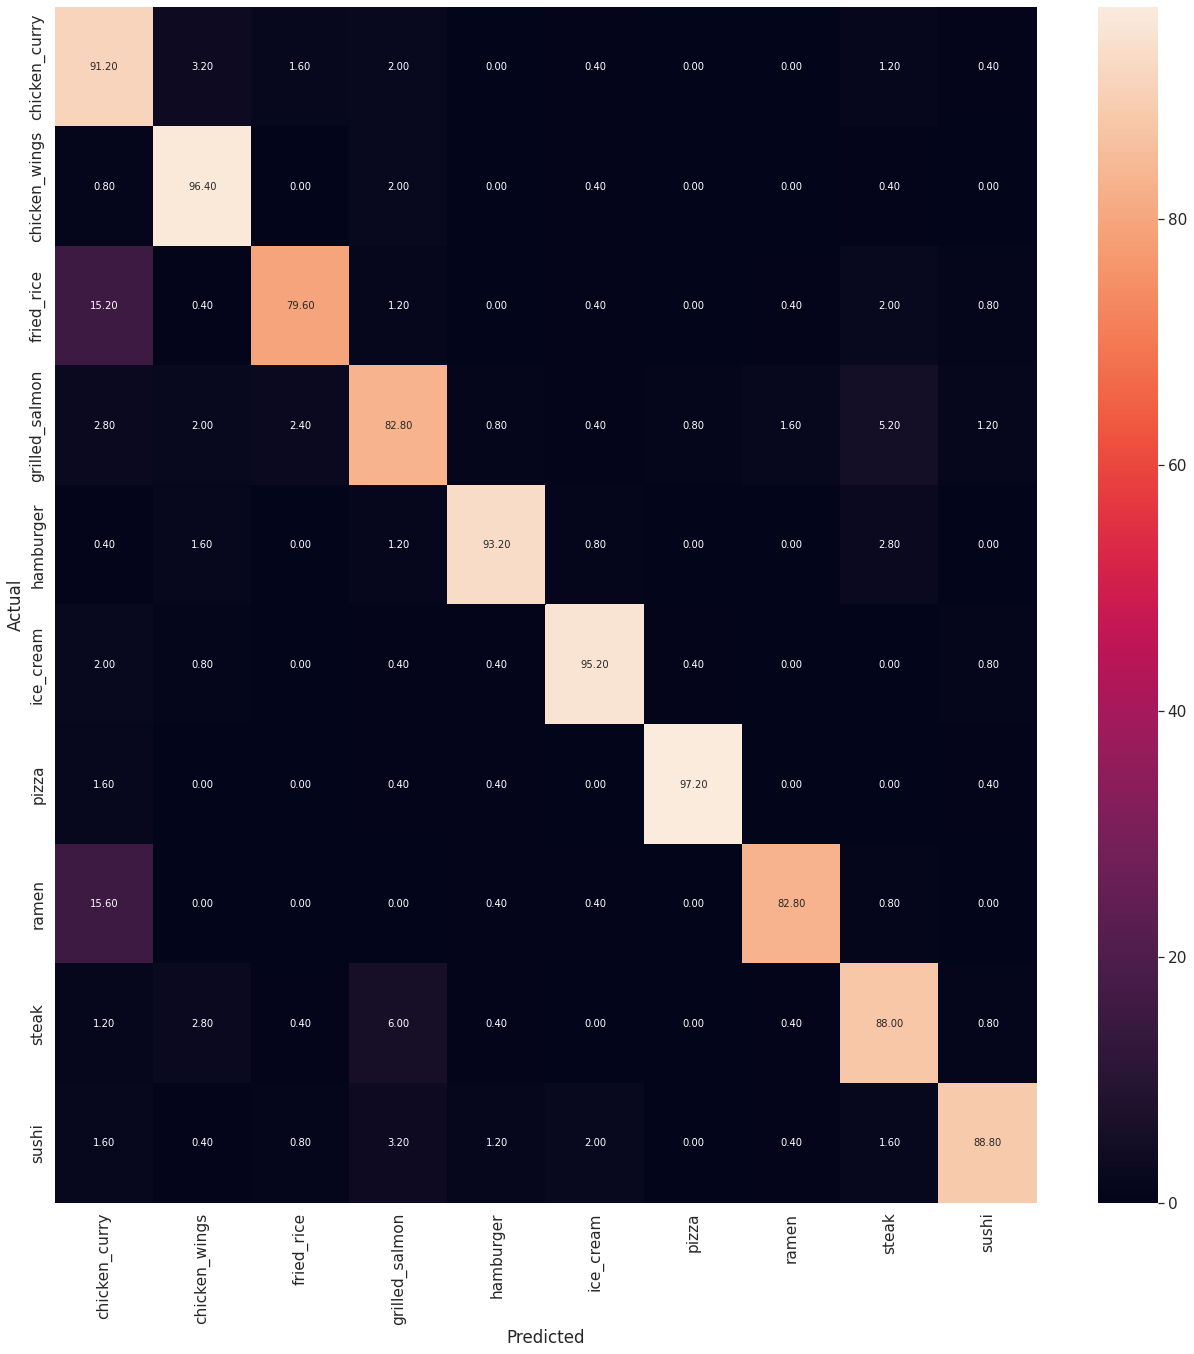

CPU times: user 6min 19s, sys: 10.5 s, total: 6min 30s
Wall time: 5min 22s


In [36]:
%%time

# Y_pred = model_2.predict(test_data).argmax(axis=0)

Y_pred = []
Y_true = []

for imgs, labels in test_data.unbatch():

  Y_true.append(labels)
  Y_pred.append(model_2.predict(np.expand_dims(imgs, axis=0), verbose=0).argmax(axis=1))

sns_confusion_matrix(Y_true,Y_pred,figsize=(22,22),class_names=class_names,text_size=10)

In [37]:
%%time

import cv2

image_path = '/content/gdrive/MyDrive/AI_Project_Files/10_food_classes_10_percent/test/chicken_wings/1010547.jpg' 

image = cv2.imread(image_path)
image = cv2.resize(image, TARGET_SIZE) # (W,H)
# image = image.reshape(1,224, 224,3)

image = image/255. 
image = image.astype(np.float32)

# print(image)

print('class pred = ',class_names[np.argmax(model_2.predict(image)[0], axis=0)])

7/7 [==============================] - 3s 24ms/step
class pred =  chicken_wings
CPU times: user 2.69 s, sys: 65.6 ms, total: 2.76 s
Wall time: 3.21 s


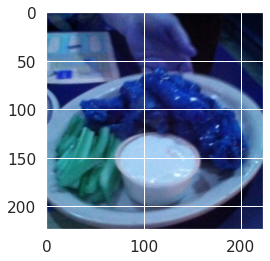

In [38]:
plt.imshow(image, cmap='gray')

In [39]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 

import itertools
from sklearn.metrics import confusion_matrix

def pretty_confusion_matrix(y_true, y_pred,figsize=(5, 5), classes = None, text_size=20):

  y_test=y_true
  y_preds=y_pred

  # figsize = (5, 5)
  
  # Create the confusion matrix
  cm = confusion_matrix(y_test, y_preds)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]
  
  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) 
  fig.colorbar(cax)
  
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)
  
  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
  
  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)
  
  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.
  
  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=15)

In [40]:
# pretty_confusion_matrix(Y_test,Y_pred,figsize=(22,22),classes=class_names,text_size=10)